### Unit 2 - In-class exercise

# Introduction

Naturalists often want to estimate the sizes of populations that are difficult to measure directly.  The capture/recapture method (also referred to as mark/recapture) allows one to estimate, for example, the number of fish in a lake.

## Objectives

There are a few things I'd like you to learn from this lab:

 1. What is the capture/recapture method?

 2. What are some potential limitations of the method, and how do they relate to sampling?

 3. How do methodological limitations of a sampling method affect estimates of quantities in the population we sampled from?

 4. Simulation studies are a valuable tool for studying statistical methods.

**Note**: In this lab, we will use a few R commands you haven't seen before.  I'd like you to try to work through and understand the R code used in this lab, but you won't be specifically responsible for knowing the new commands used in this lab for future work.  The main purpose is to use R as a tool for learning about the statistical ideas having to do with sampling in objective 3 above.

## Outline

We will explore the capture/recapture method in the context of estimating the total number of goldfish in a pond.  Our exploration will have four phases:

1. Simulation of the method using goldfish crackers to make the ideas concrete.

2. Simulation of the method using R.

3. Modified simulations in R to explore how failures in the sampling process could affect the estimates of population size.

4. (If time) Simulation in R to explore how the sample sizes drawn affect the estimates of population size.


# Phase 1: A Physical Simulation 

#### Goal: Determine the number of "goldfish" in the "pond" 

#### 1. Set up

You will be given a bag (the "pond") with an unknown number of cheddar goldfish.  This represents the population of fish in the pond.  The purpose of this excercise is to to estimate the size of this population (i.e. the number of fish in the pond).

#### 2. Capture (or Mark)

Draw a random sample of 30 fish from the lake.  These are the "captured" fish.  We're going to mark each of these fish with an identifying tag so that we will know we've captured this fish before if we see it again in the next step.  If these were real fish, we would use physical tags, but in this simulation we'll mark the fish by making them change color.  Replace each of the 30 fish you "captured" with a fish of the other flavor.  (The new goldfish replace the old ones -- don't put the old ones back into the pond!)

#### 3. Recapture

Stir the fish around in the pond so that the marked and unmarked fish are well mixed together.  Then draw a new random sample of 30 fish from the lake.  When you do this, close your eyes so that you don't introduce any bias into your sampling -- each fish should have an equal chance of being selected.  Count the number of fish in the new sample that are marked (call this number $m$).  Record this value below:

#### 4. Estimate the proportion of fish in the pond that were captured in the Capture step

If the fish were well mixed in between the Capture and Recapture steps, then it's reasonable to estimate the overall proportion of fish in the lake that have been marked by the proportion of fish sampled in the Recapture step that were marked.  Let's call the overall proportion of fish in the pond that were marked $p$.  Since $p$ is a number that describes (or summarizes) the entire population, it is a **population parameter**.  We sampled 30 fish in the Recapture step and $m$ of those were marked, so we could estimate the proportion of the population that was marked using the proportion of the sample that was marked:

$$\hat{p} = \frac{m}{30}$$

Since $\hat{p}$ is calculated from the data in your sample, it is a **sample statistic**.

Record your estimate below:

#### 5. Estimate the total number of fish in the pond

Denote the total number of fish by $N$; this is what we want to estimate ($N$ is also a population parameter).  We know that we marked 30 fish, because we captured 30 fish in the Capture step.  Therefore, the true proportion of fish that were marked is:

$$p = \frac{30}{N},$$

or equvalently,

$$N=\frac{30}{p}.$$

Replacing $p$ with its estimate from step 4, we can estimate $N$ by:

$$\widehat{N} = \frac{30}{\widehat{p}}$$

Again, $\widehat{N}$ is a sample statistic because it is calculated based on the data in our sample.

Record your estimate of $N$ below:

#### 6. Put your estimates of $p$ and $N$ on the board

#### 7. Brainstorm some possible limitations of the Capture/Recapture method outlined here.  Think about the different sampling schemes and common sampling mistakes.

# Phase 2: Simulation in R

## 2a: A single simulation in R

In this section, we will see how you could do each step of the physical simulation from Phase 1 in R.  We will use the following packages:

In [56]:
library(ggplot2)
library(dplyr)
library(mosaic)

#### 1. Set up

We first define three variables that will determine the total number of fish in the pond, how many fish we catch and mark in the Capture step, and how many we catch in the Recapture step.  Then we create a data frame called `pond_population` with two variables in it:

 1. a unique `id` for each fish in the pond (the numbers 1 through N)
 2. a variable called `marked`, which will be 0 if the fish has not been marked and 1 if the fish has been marked.  To start, all fish are unmarked.

Run the code below, and then take a look at the `pond_population` data frame and make sure you understand what it represents.

In [60]:
N <- 100 # number of fish in the pond
C <- 30 # number of fish to sample in the Capture step
R <- 30 # number of fish to sample in the Recapture step

# Make a data frame to represent the population of all fish in the pond.
pond_population <- data.frame(
  fish_id = seq(from = 1, to = N),
  marked = rep(0, N)
)

pond_population

fish_id,marked
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0


#### 2. Capture (or Mark)

In the capture step, we capture $C$ fish and mark them.

In R, we simulate capturing the fish by randomly sampling $C$ of the fish ids.
Then, we update the `marked` variable for those fish, setting it equal to 1.

Run the R code below, then look at the output to see what's changed.  Specifically, compare the `captured_fish_ids` to which fish have been `marked` in the updated `pond_population`.

In [61]:
# Capture Step: capture C fish and mark them
#captured_fish_ids <- sample_n(pond_population, size=C, replace = FALSE, weight = NULL)
captured_fish_ids <- sample(pond_population$fish_id, size = C)
pond_population$marked[captured_fish_ids] <- 1

captured_fish_ids
pond_population

[1] 49 72 78 48 92 25 28 26 27 66 22 67 69 82 88  7 45 86  1 12 39 51  9  4 77
[26] 31 24 89 73 42

fish_id,marked
1,1
2,0
3,0
4,1
5,0
6,0
7,1
8,0
9,1
10,0


#### 3. Recapture

In the recapture step, we capture $R$ fish.  Among those $R$ fish, we count the number that were marked.

In R, we again simulate capturing the fish by randomly sampling $R$ of the fish `id`s.
Then, we count the number of those fish that were captured by adding up the values of the `marked` variable for those captured fish, and save that count in a variable called `m`.  Remember that in steps 1 and 2 above we set up the marked variable so that it is 0 for unmarked fish and 1 for marked fish.  That means that if I add up these values for the fish in my sample, I get a count of how many fish in the sample were `marked`.

Run the R code below, then look at the `recaptured_fish_ids` and `m`.

In [62]:
## Recapture step: capture R fish.  Of those, count how many were marked
recaptured_fish_ids <- sample(pond_population$fish_id, size = R)
m <- sum(pond_population$marked[recaptured_fish_ids])

pond_population$marked[recaptured_fish_ids]

recaptured_fish_ids
m

[1] 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0

[1]  42  61  25  82  99  14  19   5  48  93  50 100  32  81  66  69  94  11  26
[20]   9  24  80  68  17  43  85  23  20  22  54

[1] 10

#### 4. Estimate the proportion of fish in the pond that were captured in the Capture step

We can use R to calculate the estimated proportion $\hat{p} = m/R$ as follows.  Go ahead and run this code.

In [63]:
## Estimate proportion of fish in the pond that were marked in the Capture step:
## The number of fish sampled in the Recapture step that were marked divided by
## the total number of fish sampled in the Recapture step.
p_hat <- m / R
p_hat

[1] 0.3333333

#### 5. Estimate the total number of fish in the pond

We can use R to calculate the estimated total number of fish in the pond, $\widehat{N} = c/\widehat{p}$, as follows.  Go ahead and run this code.

In [64]:
## Estimate the total number of fish in the pond:
## The number of fish that were marked in the Capture step divided by the
## estimated proportion of fish that were 
N_hat <- C / p_hat
N_hat

[1] 90

We've now finished one simulation!

## 2b: Repeating the simulation

It's great that we can do the simulation once, but we really want to do it hundreds or thousands of times and save all of the results.  Running the above code cells thousands of times by hand would be tedious; let's automate this process.

That's what the R code below does.  This R code puts together all of the code in the previous 5 cells, with two additions:
 1. The line `simulation_results <- do(1000) * {` says to "do everything between the following curly braces 1000 times", and save the results in a new data frame called `simulation_results`.  The code between the curly braces does one simulation, so effectively we're repeating the simulation 1000 times.
 2. Near the end of the R chunk, after doing the computations for one simulation, we make a data frame that stores the `p_hat` and `N_hat` values obtained in that simulation run.  R will automatically assemble these data frames from the different simulation runs, so the final result (what gets stored in the `simulation_results`) is a data frame with 1000 rows (one for each simulation run) and two variables (the `p_hat` and `N_hat` from each simulation run).

Go ahead and run the R code below, and then take a look at the `simulation_results` data frame that gets created.  (If you get an error -- did you run the R cell earlier in this document that loaded the packages we're using today?)

In [65]:
N <- 100 # number of fish in the pond
C <- 30 # number of fish to sample in the Capture step
R <- 30 # number of fish to sample in the Recapture step

simulation_results <- do(1000) * {
  ## Setup step: make a data frame representing all of the fish in the pond
  pond_population <- data.frame(
    fish_id = seq(from = 1, to = N),
    marked = rep(0, N)
  )

  ## Capture step: capture C fish and add a variable to the data frame
  ## with a 1 if the fish was marked and a 0 if it was not
  captured_fish_ids <- sample(pond_population$fish_id, size = C)
  pond_population$marked[captured_fish_ids] <- 1

  ## Recapture step: capture R fish.  Of those, count how many were marked
  recaptured_fish_ids <- sample(pond_population$fish_id, size = R)
  m <- sum(pond_population$marked[recaptured_fish_ids])
  
  ## Estimate proportion of fish in the pond that were marked in the Capture step:
  ## The number of fish sampled in the Recapture step that were marked divided by
  ## the total number of fish sampled in the Recapture step.
  p_hat <- m / R
  
  ## Estimate the total number of fish in the pond:
  ## The number of fish that were marked in the Capture step divided by the
  ## estimated proportion of fish that were 
  N_hat <- C / p_hat
  
  data.frame(p_hat = p_hat, N_hat = N_hat)
}

simulation_results

p_hat,N_hat,.row,.index
0.3000000,100.00000,1,1
0.2666667,112.50000,1,2
0.4000000,75.00000,1,3
0.2666667,112.50000,1,4
0.3666667,81.81818,1,5
0.2333333,128.57143,1,6
0.2000000,150.00000,1,7
0.4000000,75.00000,1,8
0.4000000,75.00000,1,9
0.2666667,112.50000,1,10


#### 1. Make a histogram of `p_hat` from the simulation results, and a second histogram of `N_hat`.  

The data frame with these variables is called `simulation_results`.  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


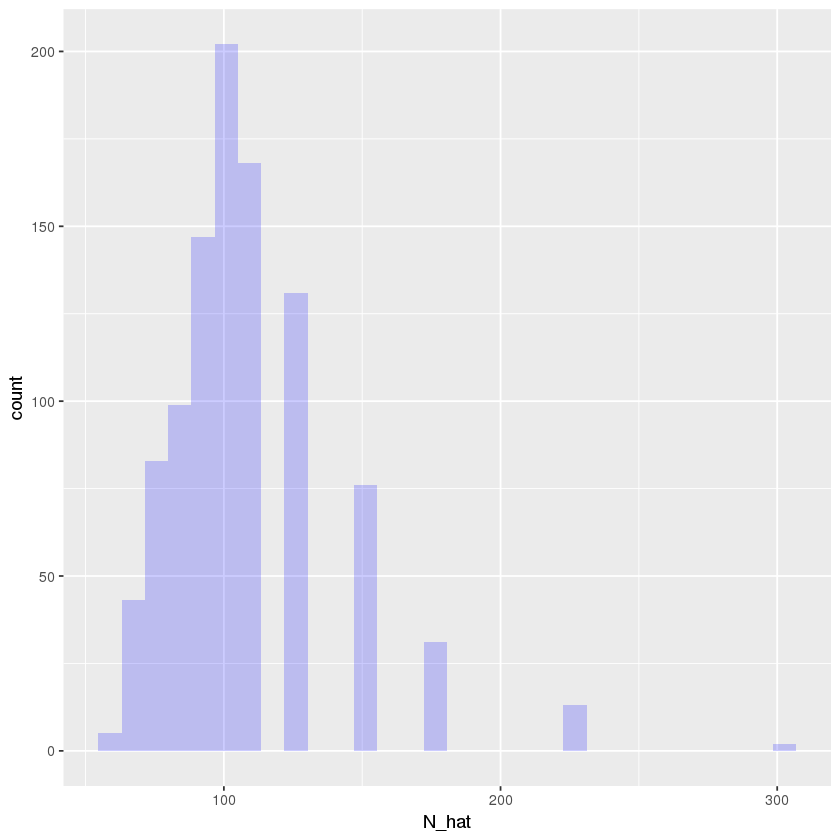

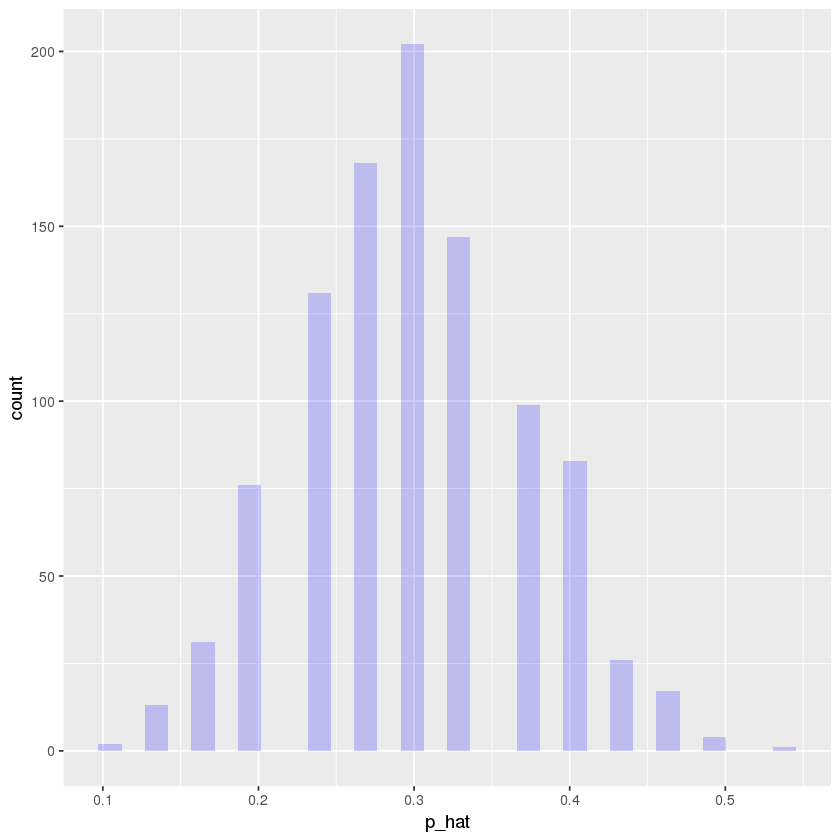

In [66]:
ggplot(data=simulation_results, aes(N_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

ggplot(data=simulation_results, aes(p_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

#### 2. Calculate the mean and median of each of these values across all of the simulations.

In [67]:
simulation_results %>% 
    summarize(mean=mean(p_hat), median=median(p_hat)) 

simulation_results %>%
summarize(mean=mean(N_hat), median=median(N_hat))


mean,median
0.2985,0.3


mean,median
107.192,100


#### 3. Report on your observations

Because we set up the simulation study, we know that the true proportion of fish that were marked (the true $p$) was $p = 30/100 = 0.3$, and that the true population size was $N = 100$.  What do you observe about the distribution of estimates of the proportion of fish in the population that were marked and the population size across different samples?  Describe the shape of the distribution of estimates; are there any outliers?  Do the estimates generally seem to be centered around the right place?  How much variability is there in the estimates that you get from different samples?

# Phase 3: Exploration of Limitations

So far, everything we've done has assumed that we were equally likely to capture any of the fish in the Capture and Recapture steps, and that we could definitely tell whether or not each fish we caught in the Recapture step had been previously caught and marked in the Capture step.  The estimates of the proportion of fish in the pond that were marked in the Capture step and the total population size that we calculated depend on these assumptions.  What happens if these assumptions are wrong, and some fish are more or less likely to be captured or we can't tell if a fish we see in the Recapture step was previously marked?  Here, we will modify our simulation study in order to explore a couple of ways this could happen and what the effects on our estimates of population size are.

## 3a: Trap-happy and Trap-shy (sample volunteers/sample conveniently)

In the wild, it happens that some animals are more likely to be captured ("trap-happy") and other may be less likely to be captured ("trap-shy").  We can represent this in our R code above by adding a `prob` argument when we call the `sample` function.  This argument should be a vector of length $N$ giving the relative weights for how likely each fish is to be captured.  For example, suppose the first 20 fish are ten times as likely to be captured as the remaining 80 fish.  We can use the following lines to sample fish with these weights (after running this code, make sure you understand what the `sampling_weights` vector represents):

In [68]:
sampling_weights <- c(rep(10, 20), rep(1, 80))
sample(pond_population$fish_id, size = C, prob = sampling_weights)

[1] 51 94 14 18 86  3 25  2 45 20 11 35 66 12  4 16 17 96 37 13  6 26  5 39 10
[26] 24 15 70  8 48

#### 1. Introduce sampling bias in the simulation study

Try The R cell below contains the original code from section 2 (b) above, to do the simulation study assuming all of the fish are equally likely to be captured.  Modify the calls to the `sample` function in both the Capture and Recapture steps to use unequal sampling weights for the different fish by setting a `prob = ` argument.

In [69]:
N <- 100 # number of fish in the pond
C <- 30 # number of fish to sample in the Capture step
R <- 30 # number of fish to sample in the Recapture step

simulation_results <- do(1000) * {
  ## Setup step: make a data frame representing all of the fish in the pond
  pond_population <- data.frame(
    fish_id = seq(from = 1, to = N),
    marked = rep(0, N)
  )

  ## Capture step: capture C fish and add a variable to the data frame
  ## with a 1 if the fish was marked and a 0 if it was not
  captured_fish_ids <- sample(pond_population$fish_id, size = C, prob = sampling_weights)
  pond_population$marked[captured_fish_ids] <- 1

  ## Recapture step: capture R fish.  Of those, count how many were marked
  recaptured_fish_ids <- sample(pond_population$fish_id, size = R, prob = sampling_weights)
  m <- sum(pond_population$marked[recaptured_fish_ids])
  
  ## Estimate proportion of fish in the pond that were marked in the Capture step:
  ## The number of fish sampled in the Recapture step that were marked divided by
  ## the total number of fish sampled in the Recapture step.
  p_hat <- m / R
  
  ## Estimate the total number of fish in the pond:
  ## The number of fish that were marked in the Capture step divided by the
  ## estimated proportion of fish that were 
  N_hat <- C / p_hat
  
  data.frame(p_hat = p_hat, N_hat = N_hat)
}

simulation_results

p_hat,N_hat,.row,.index
0.5333333,56.25000,1,1
0.5666667,52.94118,1,2
0.5666667,52.94118,1,3
0.6333333,47.36842,1,4
0.5666667,52.94118,1,5
0.5333333,56.25000,1,6
0.4666667,64.28571,1,7
0.4666667,64.28571,1,8
0.4666667,64.28571,1,9
0.5333333,56.25000,1,10


#### 2. Make a histogram of `p_hat`, and a second histogram of `N_hat`.  

The data frame with these variables is called `simulation_results`.  



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


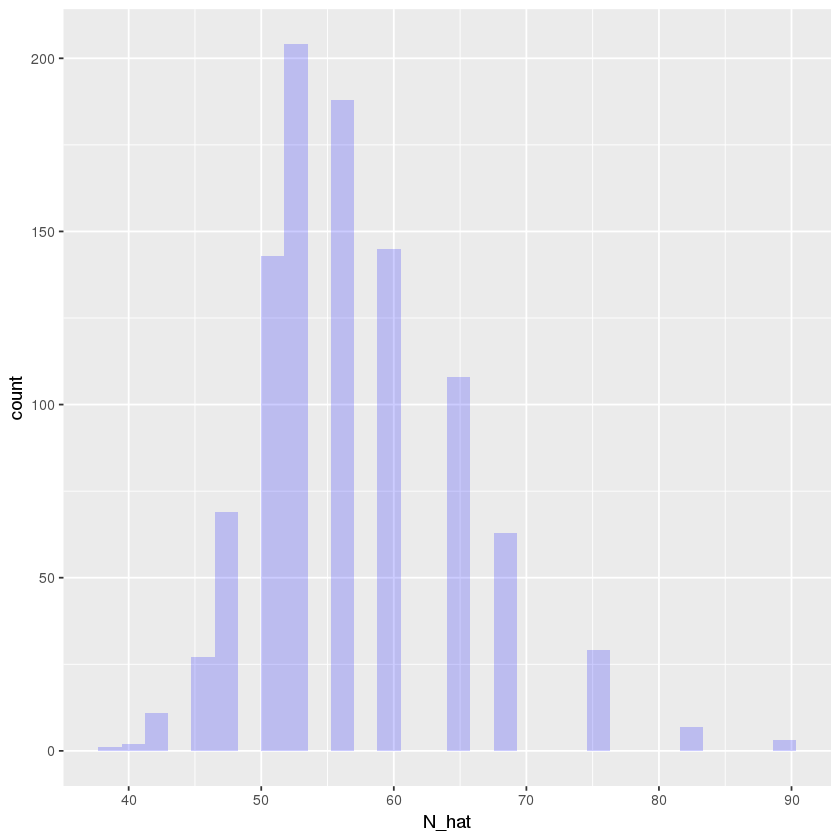

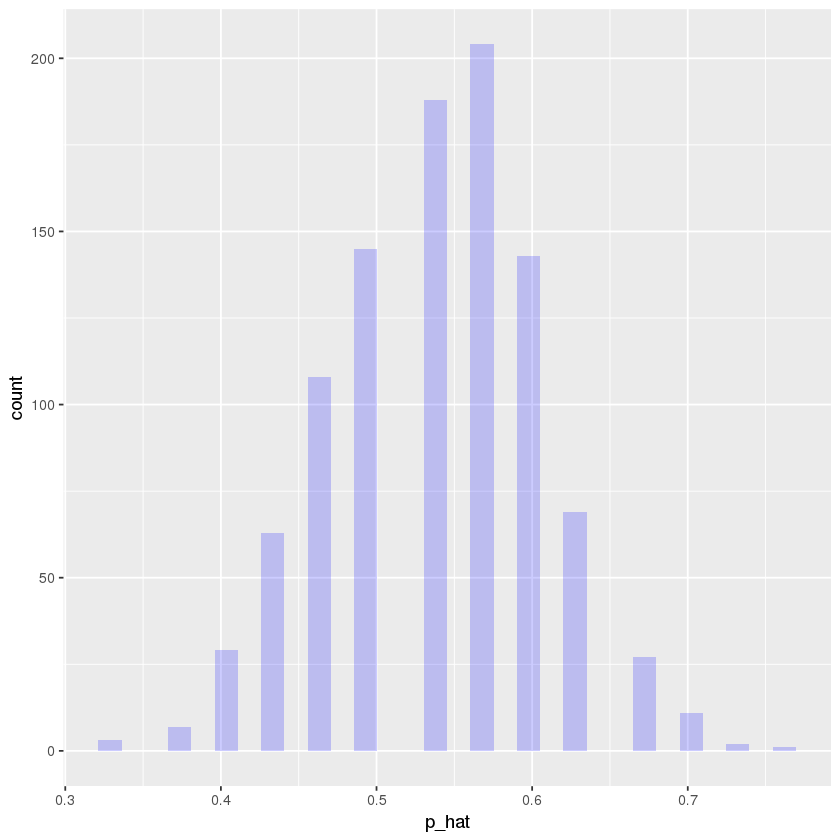

In [70]:
ggplot(data=simulation_results, aes(N_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

ggplot(data=simulation_results, aes(p_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

#### 3. Calculate the mean and median of `p_hat` and `N_hat`.

In [71]:
simulation_results %>% 
    summarize(mean=mean(p_hat), median=median(p_hat)) 

simulation_results %>%
summarize(mean=mean(N_hat), median=median(N_hat))

mean,median
0.5386667,0.5333333


mean,median
56.62292,56.25


#### 4. Explain your findings

You will notice that the distribution of population size estimates has changed relative to what you saw in Phase 2.  Explain how the changes we made to the simulation study code affect the estimates of the proportion of the population that was marked in the Capture step and why this means that the population size estimates are larger or smaller.

## 3b: Marked fish less likely to be Recaptured (sample volunteers/sample conveniently)

It might also be the case that fish that were marked in the Capture step are more or less likely to be caught again in the Recapture step.  For example, maybe the experience of being tagged was traumatic and the fish will strenuously avoid being caught again.  Or maybe you treated the fish you caught really well, and the ones who were captured the first time will try to be captured again.  We can again represent this in the simulation study by modifying the sampling weights.  Now, we'll only need to modify the weights in the Recapture step, for just those fish who were captured in the Capture step.

If the fish that were tagged are one tenth as likely to be recaptured than the fish that were not tagged, we can use the following code to calculate the weights to use in the Recapture step:

In [75]:
sampling_weights <- rep(1, 100)
sampling_weights[pond_population$marked == 1] <- 0.1

#### 1. Introduce another form of sampling bias into the simulation study

The R cell below contains the original code from section 2 (b) above, to do the simulation study assuming all of the fish are equally likely to be captured.  Modify the call to the `sample()` function Recapture step to reflect the scenario where the fish that were marked in the Capture step are less likely to be caught in the Recapture step.  You will need to put the calculation of the sampling weights in just before the Recapture step, and modify the call to the `sample()` function in the Recapture step (but not the Capture step).

In [77]:
N <- 100 # number of fish in the pond
C <- 30 # number of fish to sample in the Capture step
R <- 30 # number of fish to sample in the Recapture step

simulation_results <- do(1000) * {
  ## Setup step: make a data frame representing all of the fish in the pond
  pond_population <- data.frame(
    fish_id = seq(from = 1, to = N),
    marked = rep(0, N)
  )

  ## Capture step: capture C fish and add a variable to the data frame
  ## with a 1 if the fish was marked and a 0 if it was not
  captured_fish_ids <- sample(pond_population$fish_id, size = C)
  pond_population$marked[captured_fish_ids] <- 1

  ## Recapture step: capture R fish.  Of those, count how many were marked
  recaptured_fish_ids <- sample(pond_population$fish_id, size = R, prob = sampling_weights)
  m <- sum(pond_population$marked[recaptured_fish_ids])
  
  ## Estimate proportion of fish in the pond that were marked in the Capture step:
  ## The number of fish sampled in the Recapture step that were marked divided by
  ## the total number of fish sampled in the Recapture step.
  p_hat <- m / R
  
  ## Estimate the total number of fish in the pond:
  ## The number of fish that were marked in the Capture step divided by the
  ## estimated proportion of fish that were 
  N_hat <- C / p_hat
  
  data.frame(p_hat = p_hat, N_hat = N_hat)
}

sampling_weights
summary(simulation_results)

[1] 0.1 0.1 0.1 1.0 0.1 1.0 1.0 1.0 1.0 0.1 1.0 0.1 0.1 1.0 1.0 1.0 1.0 1.0
 [19] 1.0 0.1 0.1 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.1 1.0 0.1 0.1
 [37] 1.0 1.0 0.1 1.0 0.1 0.1 1.0 1.0 1.0 1.0 1.0 0.1 1.0 1.0 1.0 0.1 1.0 0.1
 [55] 0.1 0.1 1.0 1.0 1.0 1.0 0.1 0.1 0.1 1.0 1.0 1.0 0.1 1.0 0.1 1.0 1.0 1.0
 [73] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.1 0.1 1.0
 [91] 1.0 0.1 0.1 1.0 1.0 1.0 1.0 1.0 0.1 1.0

     p_hat             N_hat             .row       .index      
 Min.   :0.06667   Min.   : 56.25   Min.   :1   Min.   :   1.0  
 1st Qu.:0.26667   1st Qu.: 90.00   1st Qu.:1   1st Qu.: 250.8  
 Median :0.30000   Median :100.00   Median :1   Median : 500.5  
 Mean   :0.30067   Mean   :106.54   Mean   :1   Mean   : 500.5  
 3rd Qu.:0.33333   3rd Qu.:112.50   3rd Qu.:1   3rd Qu.: 750.2  
 Max.   :0.53333   Max.   :450.00   Max.   :1   Max.   :1000.0  

#### 2. Make a histogram or density plot of `p_hat`, and a second histogram or density plot of `N_hat`.  

The data frame with these variables is called `simulation_results`.  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


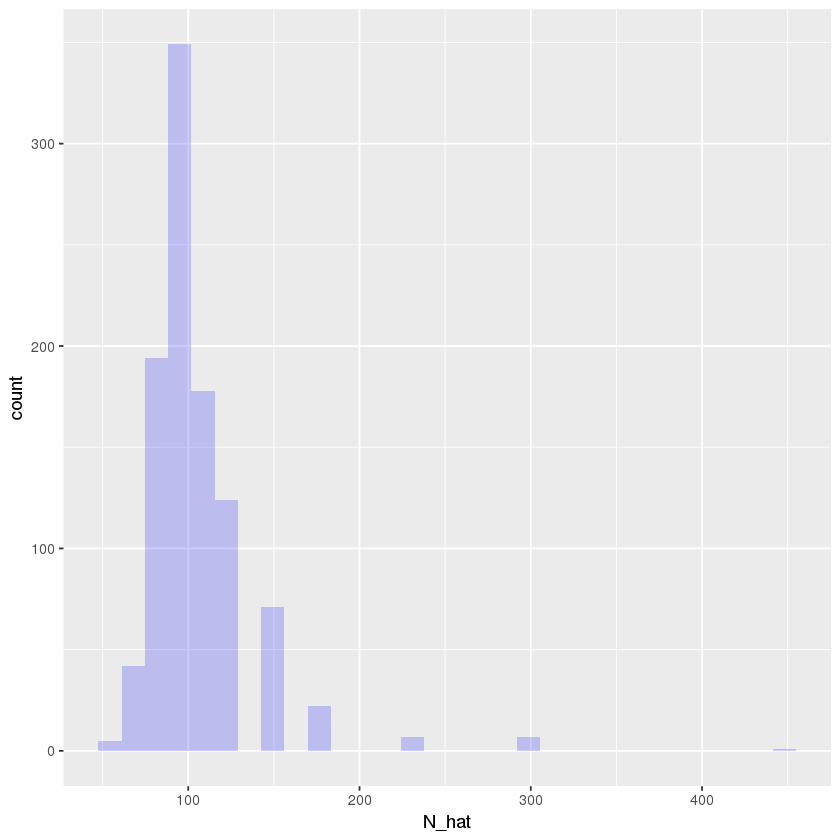

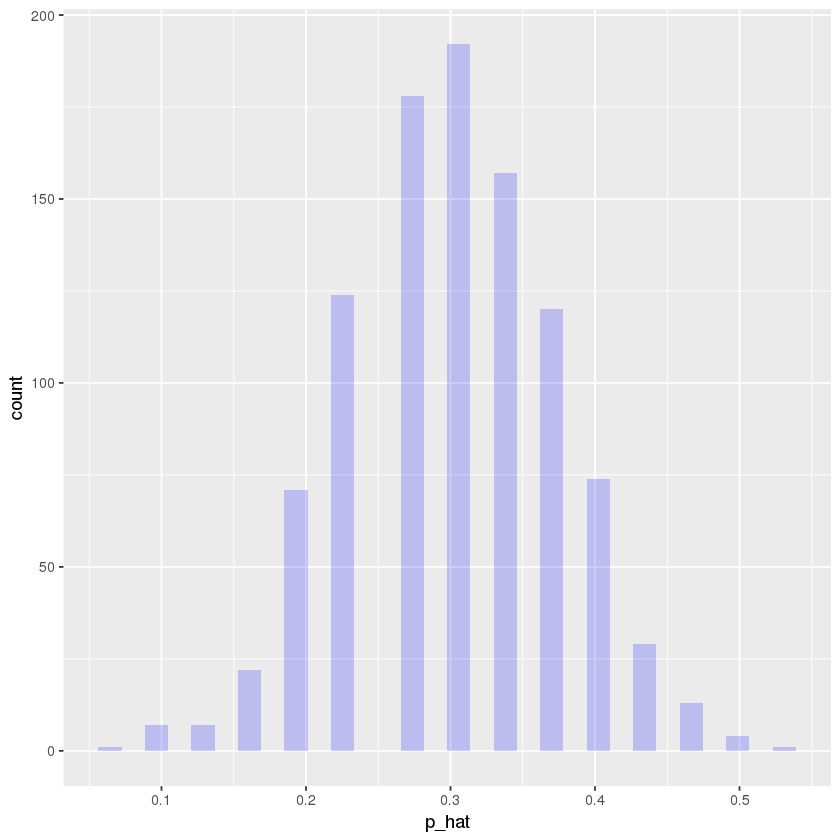

In [78]:
ggplot(data=simulation_results, aes(N_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

ggplot(data=simulation_results, aes(p_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

#### 3. Calculate the mean and median of `p_hat` and `N_hat`.

In [79]:
simulation_results %>% 
    summarize(mean=mean(p_hat), median=median(p_hat)) 

simulation_results %>%
summarize(mean=mean(N_hat), median=median(N_hat))

mean,median
0.3006667,0.3


mean,median
106.5407,100


#### 4. Explain your findings

You will notice that the distribution of population size estimates has changed.  Explain how the changes we made to the simulation study code affect the estimates of the proportion of the population that was marked in the Capture step and why this means that the population size estimates are larger or smaller.

#### Optional: If you'd like, you can also repeat the above, but where marked fish are 10 times as likely to be caught in the Recapture step as unmarked fish.

## 3c: Tags not securely attached (response bias)

If the tags are not securely attached to the fish, they could fall off between the Capture and Recapture steps.  This would mean that in the Recapture step, we wouldn't know for sure whether or not any fish we catch that don't have tags were caught previously and marked.

In our simulation study, we can represent this by marking fewer than the intended number of fish.  For example, if we intended to mark 30 fish but 1/3 of the tags fell off, we could represent this in the R code by sampling only 20 fish to mark in the Capture step (but still use the number 30 when calculating the estimated population size `N_hat`):

In [42]:
captured_fish_ids <- sample(pond_population$fish_id, size = 20)

#### 1.  Try introducing response bias

The R cell below contains the original code from section 2 (b) above, to do the simulation study assuming all of the fish are equally likely to be captured and that the tags don't fall off between the Capture step and the Recapture step.  Modify the calls to the `sample()` function in the Capture step to reflect the scenario where the fish that were marked in the Capture step are not all tagged successfully.  As above, let's assume that 1/3 of the tags fall off between the Capture and Recapture steps.  You will need to modify the call to the `sample()` function in the Capture step (but not the Recapture step).

In [80]:
N <- 100 # number of fish in the pond
C <- 30 # number of fish to sample in the Capture step
R <- 30 # number of fish to sample in the Recapture step

simulation_results <- do(1000) * {
  ## Setup step: make a data frame representing all of the fish in the pond
  pond_population <- data.frame(
    fish_id = seq(from = 1, to = N),
    marked = rep(0, N)
  )

  ## Capture step: capture C fish and add a variable to the data frame
  ## with a 1 if the fish was marked and a 0 if it was not
  captured_fish_ids <- sample(pond_population$fish_id, size = 20)
  pond_population$marked[captured_fish_ids] <- 1

  ## Recapture step: capture R fish.  Of those, count how many were marked
  recaptured_fish_ids <- sample(pond_population$fish_id, size = R)
  m <- sum(pond_population$marked[recaptured_fish_ids])
  
  ## Estimate proportion of fish in the pond that were marked in the Capture step:
  ## The number of fish sampled in the Recapture step that were marked divided by
  ## the total number of fish sampled in the Recapture step.
  p_hat <- m / R
  
  ## Estimate the total number of fish in the pond:
  ## The number of fish that were marked in the Capture step divided by the
  ## estimated proportion of fish that were 
  N_hat <- C / p_hat
  
  data.frame(p_hat = p_hat, N_hat = N_hat)
}

summary(simulation_results)

     p_hat             N_hat             .row       .index      
 Min.   :0.03333   Min.   : 69.23   Min.   :1   Min.   :   1.0  
 1st Qu.:0.16667   1st Qu.:128.57   1st Qu.:1   1st Qu.: 250.8  
 Median :0.20000   Median :150.00   Median :1   Median : 500.5  
 Mean   :0.20307   Mean   :163.57   Mean   :1   Mean   : 500.5  
 3rd Qu.:0.23333   3rd Qu.:180.00   3rd Qu.:1   3rd Qu.: 750.2  
 Max.   :0.43333   Max.   :900.00   Max.   :1   Max.   :1000.0  

#### 2. Make a histogram or density plot of `p_hat`, and a second histogram or density plot of `N_hat`. 

The data frame with these variables is called `simulation_results`.  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


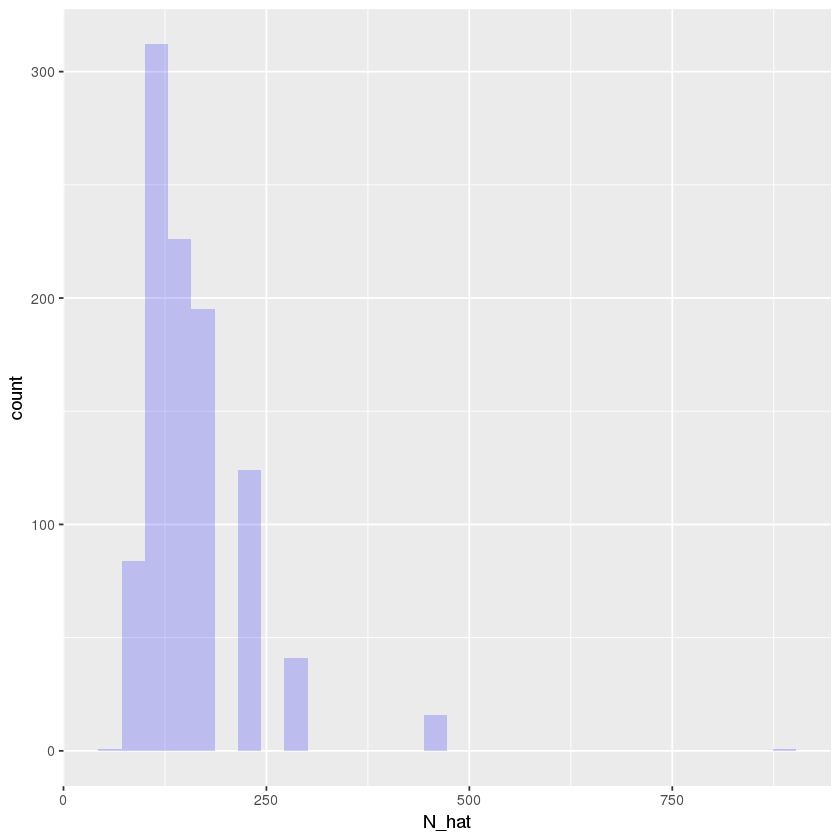

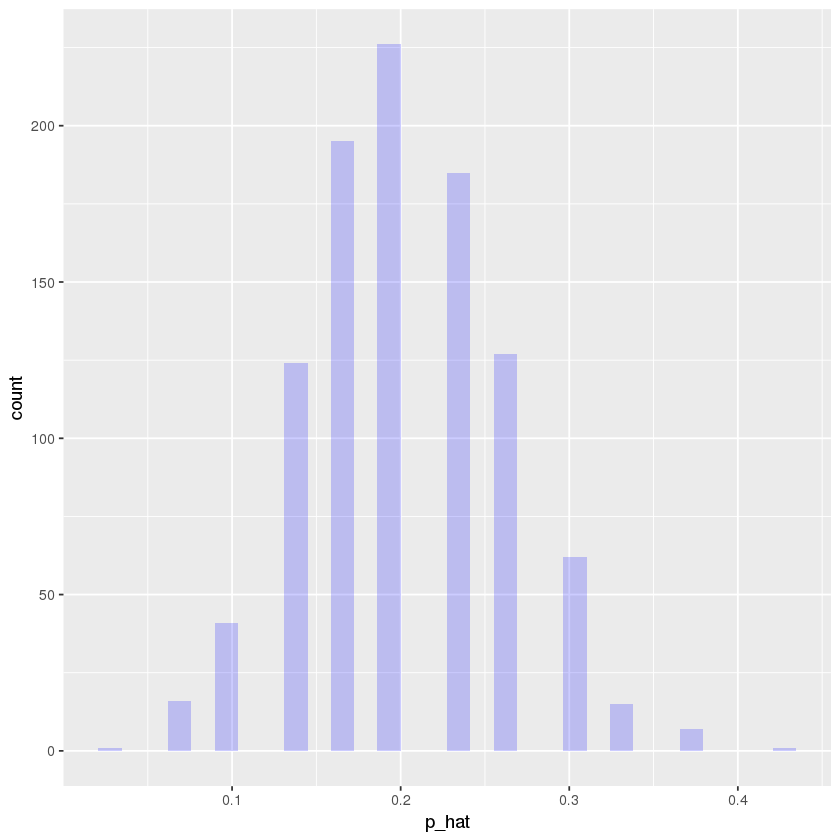

In [81]:
ggplot(data=simulation_results, aes(N_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

ggplot(data=simulation_results, aes(p_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

#### 3. Calculate the mean and median of `p_hat` and `N_hat`.

In [82]:
simulation_results %>% 
    summarize(mean=mean(p_hat), median=median(p_hat)) 

simulation_results %>%
summarize(mean=mean(N_hat), median=median(N_hat))

mean,median
0.2030667,0.2


mean,median
163.5652,150


#### 4. Explain your findings.

You will notice that the distribution of population size estimates has changed.  Explain how the changes we made to the simulation study code affect the estimates of the proportion of the population that was marked in the Capture step and why this means that the population size estimates are larger or smaller.

# Phase 4: The effect of sample size on estimates of population size.

So far, we have used a sample size of 30 fish in each of the Capture and Recapture steps.  What if the boss tells us that we now only have enough money to catch 10 or 20 fish in each phase.  How much will that impact our estimates of population size?  Can we make an argument that our sample sizes should be even larger, maybe 40 fish?  Repeat the above simulation study, but using different numbers of fish caught to the Capture and Recapture steps:

 * Mark $C = 10$ fish in the Capture step, and catch $R = 10$ fish in the Recapture step
 * Mark $C = 20$ fish in the Capture step, and catch $R = 20$ fish in the Recapture step
 * Mark $C = 40$ fish in the Capture step, and catch $R = 40$ fish in the Recapture step

## 4a: $C = 10$, $R = 10$

Modify the code in the R cell below to mark $C = 10$ fish in the Capture step, and catch $R = 10$ fish in the Recapture step.

In [46]:
N <- 100 # number of fish in the pond
C <- 10 # number of fish to sample in the Capture step
R <- 10 # number of fish to sample in the Recapture step

simulation_results <- do(1000) * {
  ## Setup step: make a data frame representing all of the fish in the pond
  pond_population <- data.frame(
    fish_id = seq(from = 1, to = N),
    marked = rep(0, N)
  )

  ## Capture step: capture C fish and add a variable to the data frame
  ## with a 1 if the fish was marked and a 0 if it was not
  captured_fish_ids <- sample(pond_population$fish_id, size = C)
  pond_population$marked[captured_fish_ids] <- 1

  ## Recapture step: capture R fish.  Of those, count how many were marked
  recaptured_fish_ids <- sample(pond_population$fish_id, size = R)
  m <- sum(pond_population$marked[recaptured_fish_ids])
  
  ## Estimate proportion of fish in the pond that were marked in the Capture step:
  ## The number of fish sampled in the Recapture step that were marked divided by
  ## the total number of fish sampled in the Recapture step.
  p_hat <- m / R
  
  ## Estimate the total number of fish in the pond:
  ## The number of fish that were marked in the Capture step divided by the
  ## estimated proportion of fish that were 
  N_hat <- C / p_hat
  
  data.frame(p_hat = p_hat, N_hat = N_hat)
}

#### Make a histogram of `p_hat`, and a second histogram of `N_hat`.  The data frame with these variables is called `simulation_results`.  Also, calculate the mean and median of each of these values.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 324 rows containing non-finite values (stat_bin).”

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


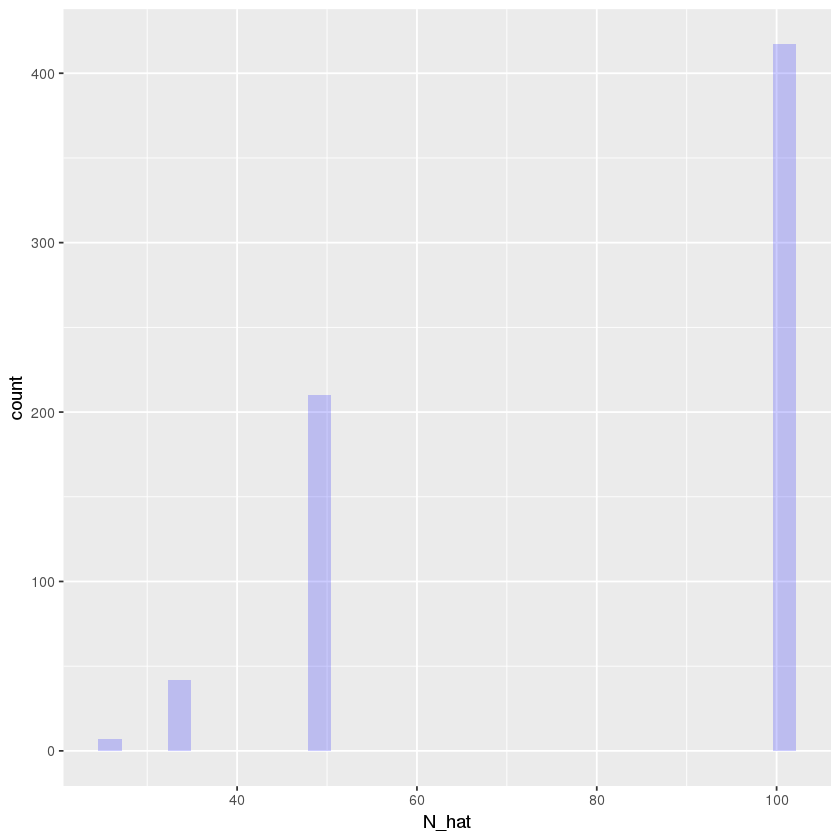

mean,median
0.0991,0.1


mean,median
Inf,100


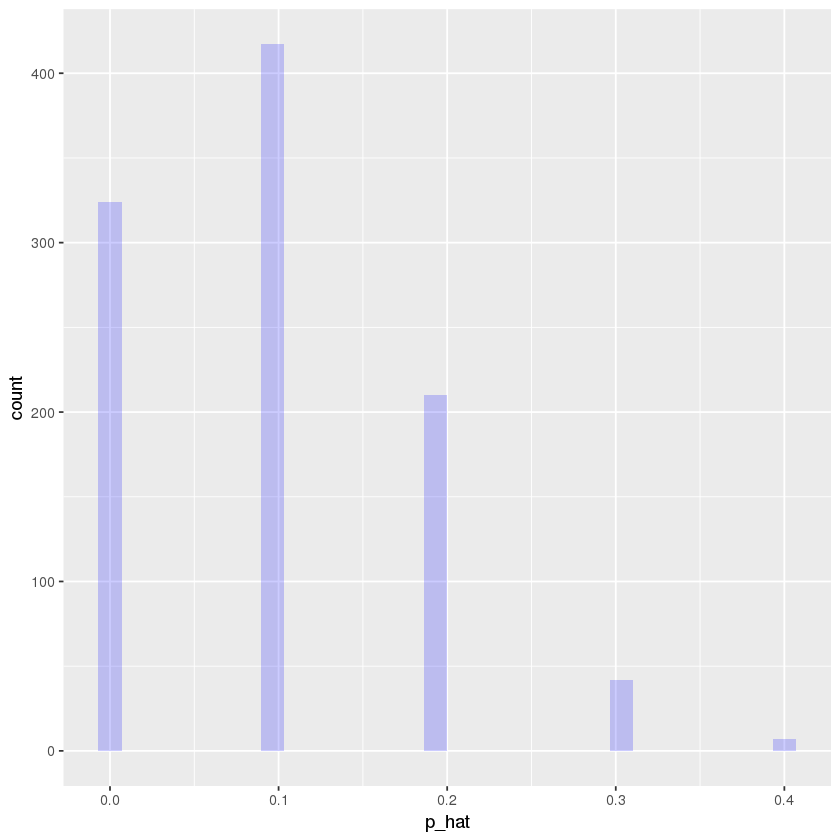

In [47]:
ggplot(data=simulation_results, aes(N_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

ggplot(data=simulation_results, aes(p_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

simulation_results %>% 
    summarize(mean=mean(p_hat), median=median(p_hat)) 

simulation_results %>%
summarize(mean=mean(N_hat), median=median(N_hat))

## 4b: $C = 20$, $R = 20$

Modify the code in the R cell below to mark $C = 20$ fish in the Capture step, and catch $R = 20$ fish in the Recapture step

In [51]:
N <- 100 # number of fish in the pond
C <- 20 # number of fish to sample in the Capture step
R <- 20 # number of fish to sample in the Recapture step

simulation_results <- do(1000) * {
  ## Setup step: make a data frame representing all of the fish in the pond
  pond_population <- data.frame(
    fish_id = seq(from = 1, to = N),
    marked = rep(0, N)
  )

  ## Capture step: capture C fish and add a variable to the data frame
  ## with a 1 if the fish was marked and a 0 if it was not
  captured_fish_ids <- sample(pond_population$fish_id, size = C)
  pond_population$marked[captured_fish_ids] <- 1

  ## Recapture step: capture R fish.  Of those, count how many were marked
  recaptured_fish_ids <- sample(pond_population$fish_id, size = R)
  m <- sum(pond_population$marked[recaptured_fish_ids])
  
  ## Estimate proportion of fish in the pond that were marked in the Capture step:
  ## The number of fish sampled in the Recapture step that were marked divided by
  ## the total number of fish sampled in the Recapture step.
  p_hat <- m / R
  
  ## Estimate the total number of fish in the pond:
  ## The number of fish that were marked in the Capture step divided by the
  ## estimated proportion of fish that were 
  N_hat <- C / p_hat
  
  data.frame(p_hat = p_hat, N_hat = N_hat)
}

#### Make a histogram of `p_hat`, and a second histogram of `N_hat`.  The data frame with these variables is called `simulation_results`.  Also, calculate the mean and median of each of these values.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 324 rows containing non-finite values (stat_bin).”

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


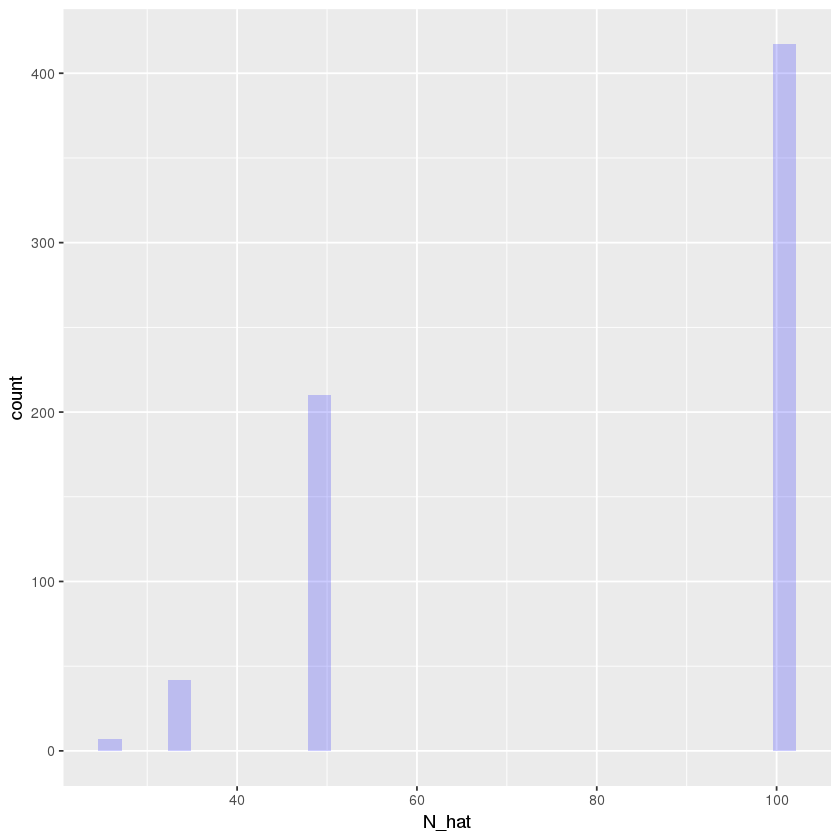

mean,median
0.0991,0.1


mean,median
Inf,100


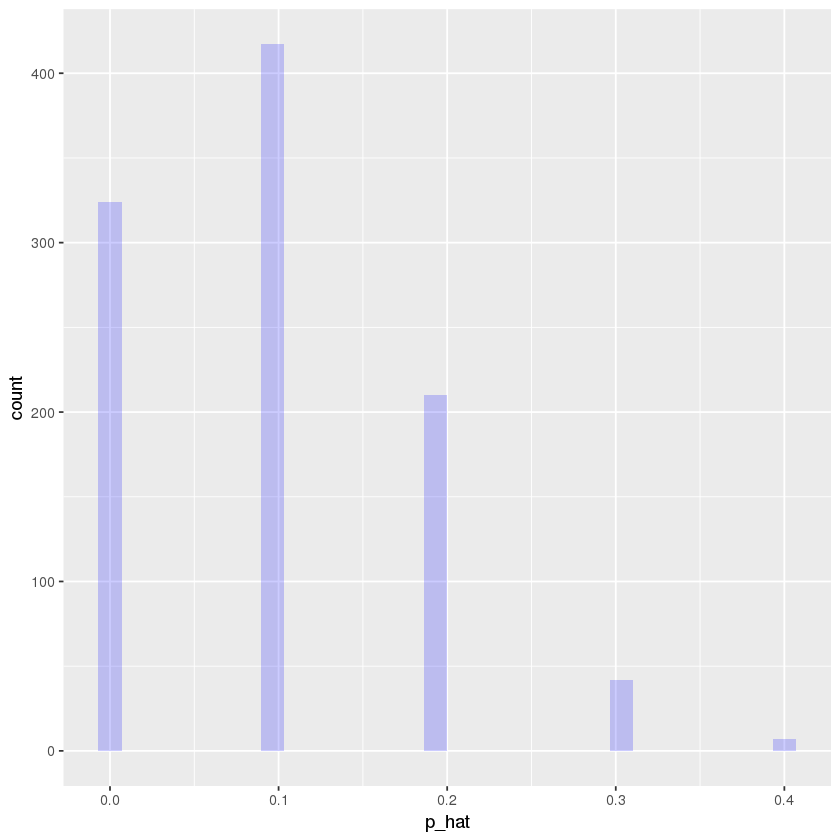

In [50]:
ggplot(data=simulation_results, aes(N_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

ggplot(data=simulation_results, aes(p_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

simulation_results %>% 
    summarize(mean=mean(p_hat), median=median(p_hat)) 

simulation_results %>%
summarize(mean=mean(N_hat), median=median(N_hat))

## 4c: $C = 40$, $R = 40$

Modify the code in the R cell below to mark $C = 40$ fish in the Capture step, and catch $R = 40$ fish in the Recapture step

In [54]:
N <- 100 # number of fish in the pond
C <- 40 # number of fish to sample in the Capture step
R <- 40 # number of fish to sample in the Recapture step

simulation_results <- do(1000) * {
  ## Setup step: make a data frame representing all of the fish in the pond
  pond_population <- data.frame(
    fish_id = seq(from = 1, to = N),
    marked = rep(0, N)
  )

  ## Capture step: capture C fish and add a variable to the data frame
  ## with a 1 if the fish was marked and a 0 if it was not
  captured_fish_ids <- sample(pond_population$fish_id, size = C)
  pond_population$marked[captured_fish_ids] <- 1

  ## Recapture step: capture R fish.  Of those, count how many were marked
  recaptured_fish_ids <- sample(pond_population$fish_id, size = R)
  m <- sum(pond_population$marked[recaptured_fish_ids])
  
  ## Estimate proportion of fish in the pond that were marked in the Capture step:
  ## The number of fish sampled in the Recapture step that were marked divided by
  ## the total number of fish sampled in the Recapture step.
  p_hat <- m / R
  
  ## Estimate the total number of fish in the pond:
  ## The number of fish that were marked in the Capture step divided by the
  ## estimated proportion of fish that were 
  N_hat <- C / p_hat
  
  data.frame(p_hat = p_hat, N_hat = N_hat)
}
summary(simulation_results)

     p_hat            N_hat             .row       .index      
 Min.   :0.1750   Min.   : 64.00   Min.   :1   Min.   :   1.0  
 1st Qu.:0.3500   1st Qu.: 88.89   1st Qu.:1   1st Qu.: 250.8  
 Median :0.4000   Median :100.00   Median :1   Median : 500.5  
 Mean   :0.4012   Mean   :102.10   Mean   :1   Mean   : 500.5  
 3rd Qu.:0.4500   3rd Qu.:114.29   3rd Qu.:1   3rd Qu.: 750.2  
 Max.   :0.6250   Max.   :228.57   Max.   :1   Max.   :1000.0  

#### Make a histogram of `p_hat`, and a second histogram of `N_hat`.  The data frame with these variables is called `simulation_results`.  Also, calculate the mean and median of each of these values.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


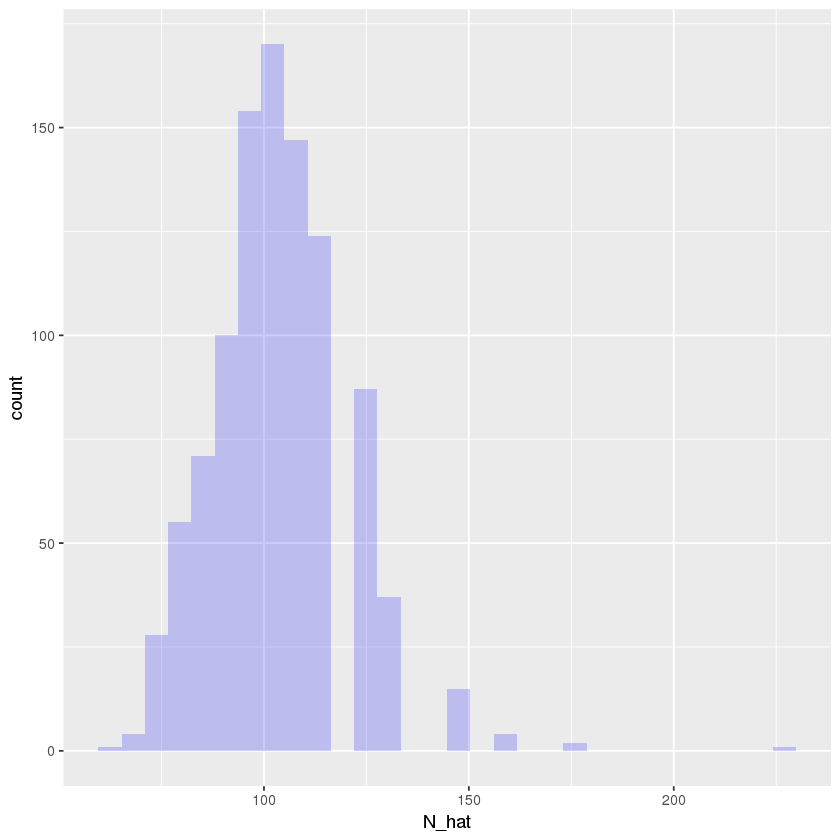

mean,median
0.401225,0.4


mean,median
102.0979,100


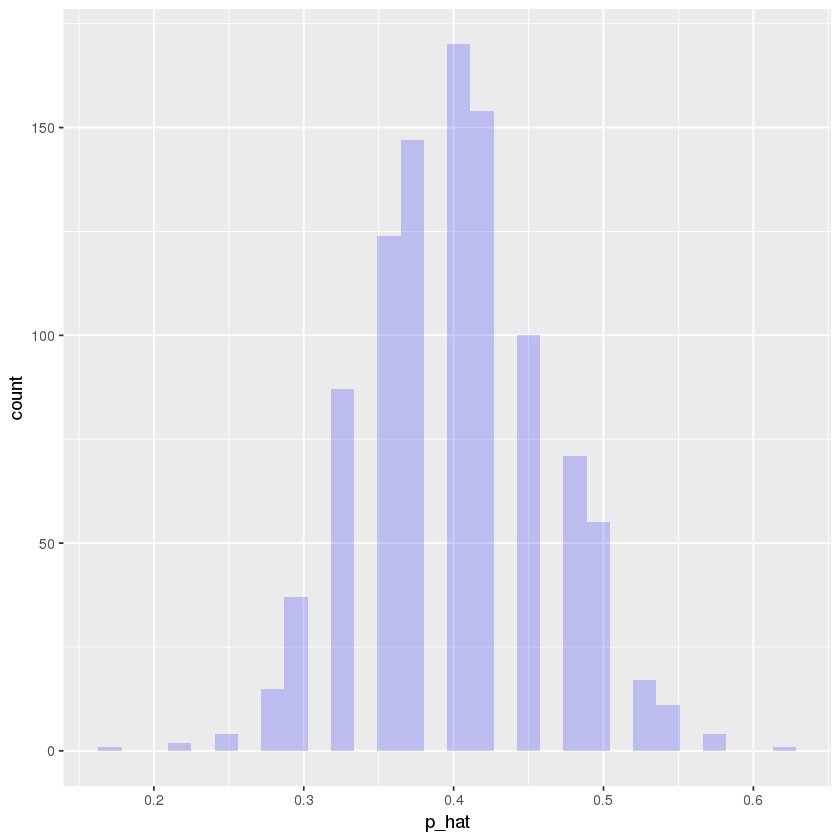

In [55]:
ggplot(data=simulation_results, aes(N_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

ggplot(data=simulation_results, aes(p_hat)) +
    geom_histogram(fill=I("blue"),alpha=I(.2))

simulation_results %>% 
    summarize(mean=mean(p_hat), median=median(p_hat)) 

simulation_results %>%
summarize(mean=mean(N_hat), median=median(N_hat))

## 4d: Wrapup

Compare the distributions of population size estimates in each scenario and with the scenario of $C = 30$ and $R = 30$ that we started off with.  How much does the sample size affect the sampling distribution of population size estimates?